# Predict Mileage for cars dataset
# Features = hp,wt,am
# Target =mpg

In [71]:
# Import necssary packages
import numpy as np
import pandas as pd
import seaborn as sb
from scipy import stats
from matplotlib import pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
%matplotlib inline

In [72]:
# Load the data
data = pd.read_csv("mtcars.csv")
data.head()

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1


In [73]:
# Basic checks / EDA
data.shape

(32, 12)

In [74]:
data.isnull().sum()

car_model    0
mpg          0
cyl          0
disp         0
hp           0
drat         0
wt           0
qsec         0
vs           0
am           0
gear         0
carb         0
dtype: int64

In [75]:
data.describe()

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,19.875000,6.187500,227.925000,145.781250,3.553125,3.200375,17.821563,0.468750,0.437500,3.656250,2.718750
std,5.989184,1.712148,121.708557,67.540542,0.566628,0.992515,1.606035,0.507007,0.504016,0.745281,1.689328
min,10.400000,4.000000,71.100000,52.000000,2.760000,1.513000,14.500000,0.000000,0.000000,3.000000,1.000000
25%,15.425000,4.000000,120.250000,103.000000,3.070000,2.428750,16.892500,0.000000,0.000000,3.000000,1.000000
50%,18.650000,6.000000,225.000000,118.000000,3.660000,3.437500,17.900000,0.000000,0.000000,3.500000,2.000000
75%,21.825000,8.000000,307.500000,180.000000,3.920000,3.610000,18.900000,1.000000,1.000000,4.000000,4.000000
max,33.900000,8.000000,472.000000,335.000000,4.930000,5.424000,20.220000,1.000000,1.000000,5.000000,8.000000


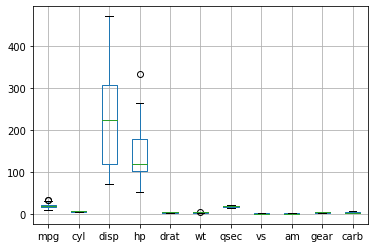

In [76]:
data.boxplot()

In [122]:
data.corr() # Checking the assumptions of Linear regression 1. Linearity of predictor values with target

,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
mpg,1.000000,-0.854553,-0.848323,-0.748338,0.664093,-0.876525,0.362559,0.610570,0.658809,0.480045,-0.510205
cyl,-0.854553,1.000000,0.904855,0.821048,-0.639699,0.828594,-0.513701,-0.773405,-0.621461,-0.453460,0.554153
disp,-0.848323,0.904855,1.000000,0.784517,-0.650057,0.909787,-0.389220,-0.676439,-0.640002,-0.520970,0.415707
hp,-0.748338,0.821048,0.784517,1.000000,-0.352187,0.666635,-0.732310,-0.717553,-0.283276,-0.061141,0.772405
drat,0.664093,-0.639699,-0.650057,-0.352187,1.000000,-0.693334,-0.117535,0.279943,0.763135,0.710735,-0.000400
wt,-0.876525,0.828594,0.909787,0.666635,-0.693334,1.000000,-0.170668,-0.547939,-0.718505,-0.588810,0.418441
qsec,0.362559,-0.513701,-0.389220,-0.732310,-0.117535,-0.170668,1.000000,0.772373,-0.207698,-0.392472,-0.756134
vs,0.610570,-0.773405,-0.676439,-0.717553,0.279943,-0.547939,0.772373,1.000000,0.181463,0.098709,-0.632025
am,0.658809,-0.621461,-0.640002,-0.283276,0.763135,-0.718505,-0.207698,0.181463,1.000000,0.842662,0.035518
gear,0.480045,-0.453460,-0.520970,-0.061141,0.710735,-0.588810,-0.392472,0.098709,0.842662,1.000000,0.305056


 Range of Skewness , S<|1.96|
 Skewness HP: 0.8824486686403539
 Skewness WT: 0.45340839946604955
 Kurtosis HP: 0.2164779989409764
 Kurtosis WT: 0.04845108327092662


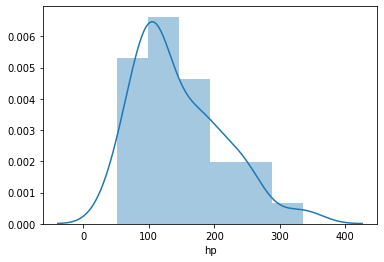

In [78]:
#2. Normality univariate multivariate 
%matplotlib inline
sb.distplot(data.hp)
print(" Range of Skewness , S<|1.96|")
print(" Skewness HP: {}".format(stats.skew(data.hp)))
print(" Skewness WT: {}".format(stats.skew(data.wt)))
print(" Kurtosis HP: {}".format(stats.kurtosis(data.hp)))
print(" Kurtosis WT: {}".format(stats.kurtosis(data.wt)))
#Both hp and wt pas normality test

In [79]:
# Define X and y
X=data.loc[:,['hp','wt','am']]
y=data.mpg

In [80]:
X.head(2)

,hp,wt,am
0,110,2.620,1
1,110,2.875,1


In [81]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

In [82]:
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

X_train Shape (24, 3)
X_test Shape (8, 3)
y_train Shape (24,)
y_test Shape (8,)


In [83]:
# Define the model
model= LinearRegression()

In [84]:
# Train the model
model.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [85]:
y_predict=model.predict(X_test)

In [86]:
r2_score(y_test,y_predict)# Model fitment efficiency

0.8901075696975214

# Optimize Linear Regression

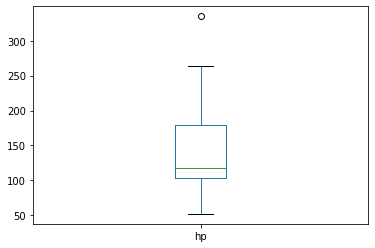

In [96]:
data.hp.plot(kind="box")

In [97]:
data[data.hp==data.hp.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
30,Maserati Bora,15.0,8,301.0,335,3.54,3.57,14.6,0,1,5,8


In [98]:
# Removing hp outlier
data_hp_outlier=data.drop(index=30)
data_hp_outlier

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
8,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [99]:
# Define X and y
X=data_hp_outlier.loc[:,['hp','wt','am']]
y=data_hp_outlier.mpg
X.head(2)

,hp,wt,am
0,110,2.620,1
1,110,2.875,1


In [100]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

In [101]:
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

X_train Shape (23, 3)
X_test Shape (8, 3)
y_train Shape (23,)
y_test Shape (8,)


In [102]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)# Model fitment efficiency

0.890861287242495

In [103]:
y_test

7     18.1
23    13.3
18    30.4
14    10.4
1     21.0
22    15.2
4     22.8
15    10.4
Name: mpg, dtype: float64

In [104]:
y_predict

array([20.01760572, 13.41279193, 29.28448231, 11.84405757, 24.03907252,
       18.22948392, 25.99909551, 11.03808129])

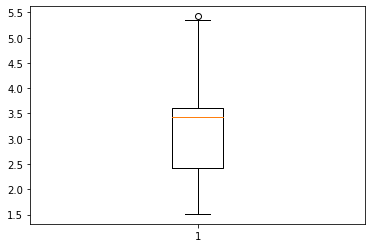

In [48]:
plt.boxplot(data.wt);

In [105]:
data[data.wt==data.wt.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
15,Lincoln Continental,10.4,8,460.0,215,3.0,5.424,17.82,0,0,3,4


In [106]:
# Removing wt outlier
data_wt_outlier=data.drop(index=15)
data_wt_outlier

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
8,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [107]:
# Define X and y
X=data_wt_outlier.loc[:,['hp','wt','am']]
y=data_wt_outlier.mpg
X.head(2)

,hp,wt,am
0,110,2.620,1
1,110,2.875,1


In [108]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

In [109]:
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

X_train Shape (23, 3)
X_test Shape (8, 3)
y_train Shape (23,)
y_test Shape (8,)


In [110]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)# Model fitment efficiency

0.6381777338164984

In [111]:
y_test

7     18.1
24    19.2
19    33.9
14    10.4
1     21.0
23    13.3
4     22.8
16    14.7
Name: mpg, dtype: float64

In [112]:
y_predict

array([18.52665885, 14.97605498, 28.31740123,  7.56785937, 22.2727268 ,
       13.2768529 , 25.32584175,  6.50154188])

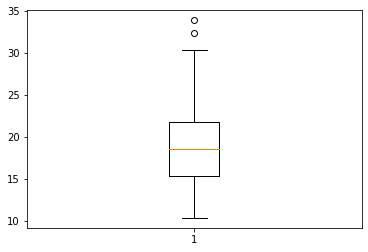

In [113]:
plt.boxplot(data.mpg); # To remove the outliers

In [114]:
data[data.mpg==data.mpg.max()]

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
19,Toyota Corolla,33.9,4,71.1,65,4.22,1.835,19.9,1,1,4,1


In [115]:
# Removing wt oultlier
data_mpg_outlier=data.drop(index=19)
data_mpg_outlier

,car_model,mpg,cyl,disp,hp,drat,wt,qsec,vs,am,gear,carb
0,Mazda RX4,21.0,6,160.0,110,3.90,2.620,16.46,0,1,4,4
1,Mazda RX4 Wag,21.0,6,160.0,110,3.90,2.875,17.02,0,1,4,4
2,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
3,Hornet 4 Drive,21.4,6,258.0,110,3.08,3.215,19.44,1,0,3,1
4,Datsun 710,22.8,4,108.0,93,3.85,2.320,18.61,1,1,4,1
5,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
6,Duster 360,14.3,8,360.0,245,3.21,3.570,15.84,0,0,3,4
7,Valiant 2,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
8,Valiant,18.1,6,225.0,105,2.76,3.460,20.22,1,0,3,1
9,Merc 280,19.2,6,167.6,123,3.92,3.440,18.30,1,0,4,4


In [116]:
# Define X and y
X=data_mpg_outlier.loc[:,['hp','wt','am']]
y=data_mpg_outlier.mpg
X.head(2)

,hp,wt,am
0,110,2.620,1
1,110,2.875,1


In [117]:
# Train-Test split
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=12)

In [118]:
print("X_train Shape", X_train.shape)
print("X_test Shape", X_test.shape)
print("y_train Shape", y_train.shape)
print("y_test Shape", y_test.shape)

X_train Shape (23, 3)
X_test Shape (8, 3)
y_train Shape (23,)
y_test Shape (8,)


In [119]:
model=LinearRegression()
model.fit(X_train,y_train)
y_predict=model.predict(X_test)
r2_score(y_test,y_predict)# Model fitment efficiency

0.8992792842835682

In [120]:
y_test

7     18.1
24    19.2
18    30.4
14    10.4
1     21.0
23    13.3
4     22.8
15    10.4
Name: mpg, dtype: float64

In [121]:
y_predict

array([19.25666451, 15.99306476, 28.19431334, 12.02699852, 23.54187721,
       13.53694762, 25.28998682, 11.31438426])